# Analysis of a Combined Cycle Power Plant

Analysis: Wong Ken Wai

<b>Introduction</b><br>
A combined-cycle power plant uses both a gas and a steam turbine together to produce up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power. 
<br>Source: https://powergen.gepower.com/resources/knowledge-base/combined-cycle-power-plant-how-it-works.html

<b>Objective</b><br>
Create a model to predict the net hourly electrical energy output (EP) of the plant using predictors (or independent variables) of Ambient Temperature, Ambient Pressure, Relative Humidity and Exhaust Vacuum.

<b>Data</b><br>
Datasource: from Aon<br>
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load.
Features consist of:
hourly average ambient variables Temperature (AT),
Ambient Pressure (AP)
, Relative Humidity (RH)
, and Exhaust Vacuum (V)
to predict the net hourly electrical energy output (EP)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. 
In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. 
While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.<br>
 

<b>Tools and software</b><br>
Python is used for data analysis and model implementation with Scikit learn library.

In [1]:
#Importing necessary modules and packages
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

First we shall load up our dataset and see what it looks like. 

In [2]:
df = pd.read_csv('/Users/KW/Desktop/Data/PowerPlant/Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Seems like it contains only continuous figures in each of the five variables.
The target column here is 'PE' (not 'EP' as stated in the given introduction, so I'll use the default 'PE'). The other 4 variables - AT, V, AP, RH will be our predictors. 

Let's get a little bit more information on the variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 448.5 KB


As confirmed there were 9568 rows of data points and no missing values were observed. 

Let's get some summary statistics on the data.

In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


From their ranges, nothing seems out of the ordinary, eg ambient temperature falls within normal environmental temperatures (1.8 - 37 degree celsius). Of course we may need to seek subject matter experts to confirm the acceptable ranges, but for now let's assume there are no extreme outliers. 

# Visualize the data

Next, we will visually explore how each of the variables compared to each other using a pairplot.<br>We can do this using pairplot from the seaborn library

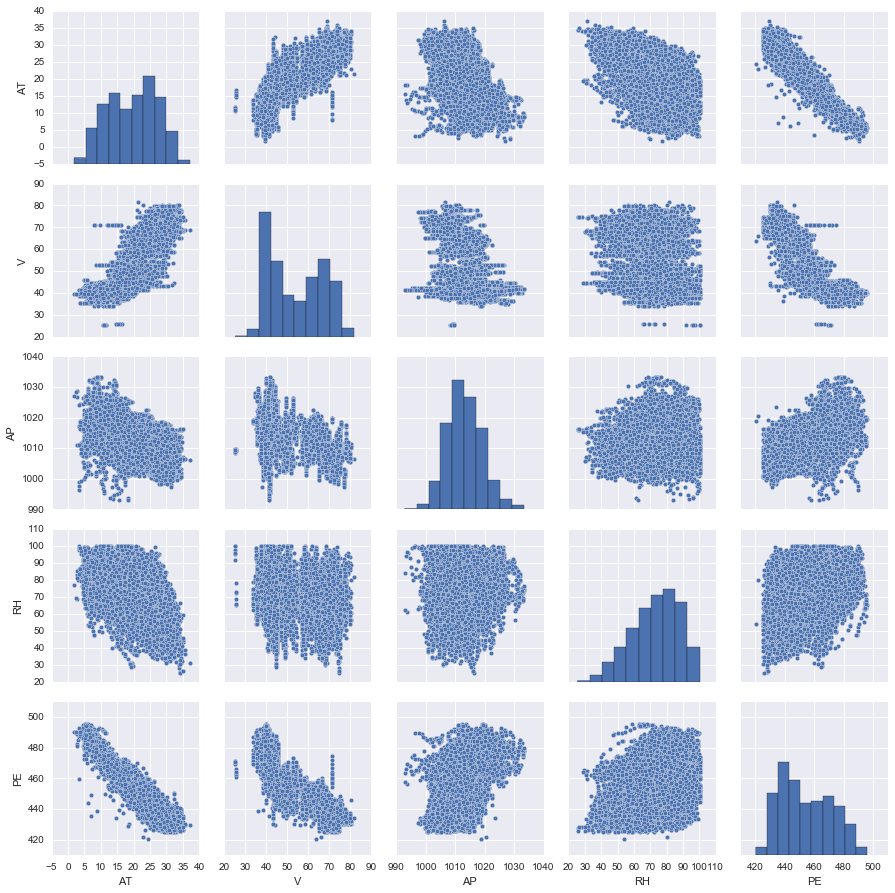

In [5]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
sns.pairplot(df)

From the pairplots, we observed that there is a strong negative linear relationship between AT and PE. This means when ambient temperature increase, electrical output decrease. There also seems to be a negative linear relationship between V, the exhaust vacuum, and PE.


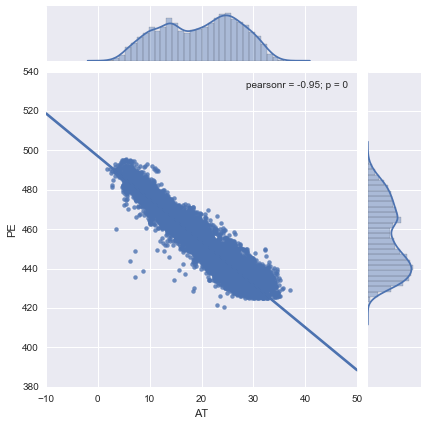

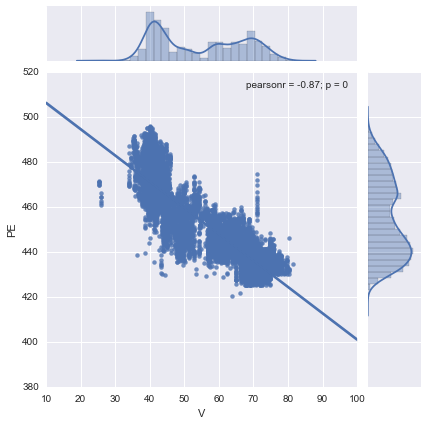

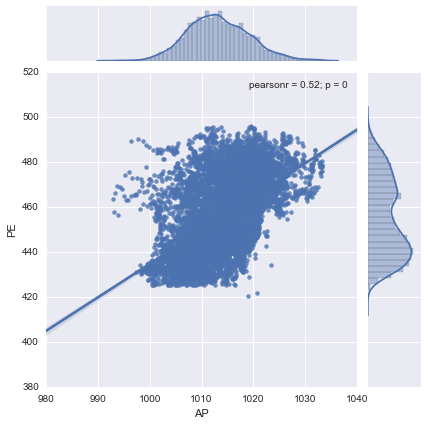

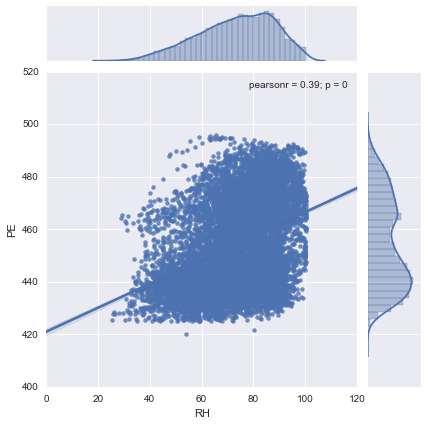

In [6]:
# A closer look of the above observations using a linear fit 
sns.jointplot(x="AT", y="PE", data=df, kind="reg");
sns.jointplot(x="V", y="PE", data=df, kind="reg");
sns.jointplot(x="AP", y="PE", data=df, kind="reg");
sns.jointplot(x="RH", y="PE", data=df, kind="reg");

# Linear Regression

Since the target variable and the independent variables are of continuous type, and there seems to be a linear relationship between the target and independent variables, we will fit a linear regression model and predict the electric energy output. Having more than 1 predictor, this will be a multiple linear regression problem with an equation given as:<br>
Y = b0 + b1X1 + b2X2 + b3X3 + b4X4 <br>
where Y is the Electrical energy ouput, b0 is the Y intercept and b1,b2,b3,b4 are the partial regression coefficients. 

<br>We will be using Scikit Learn library for this task.

In [7]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [8]:
# Create a LinearRegression Object
#lreg = LinearRegression()
lreg = LinearRegression(normalize=True)

We will start by seperating our dataframe into the data columns and the target columns.

Y = electrical energy output (our target output)

X = all the other features (independent variables)

We need to drop PE from the X columns as a predictor.

In [9]:
# Data Columns
X = df.drop('PE',1)

# Target
Y = df.PE

In [10]:
# Finally implement the Linear Regression

lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
print ' The estimated intercept coefficient is %.2f ' %lreg.intercept_
print ' The number of coefficients used was %d ' % len(lreg.coef_)

 The estimated intercept coefficient is 454.61 
 The number of coefficients used was 4 


Now that we have found the Y intercept of the model to be 454.61 Let's see what are the estimated coefficients for all the other features.

In [12]:
pd.DataFrame(zip(X, lreg.coef_), columns = ['Features', 'Est. Coefficients'])

,Features,Est. Coefficients
0,AT,-1.977513
1,V,-0.233916
2,AP,0.062083
3,RH,-0.158054


So our multiple linear regression formula looks like this:

<b>PE = 454.61 − 1.977513AT − 0.233916V + 0.062083AP − 0.158054RH</b>

From what we have visualized earlier, it seems the highest correlation between a feature and electric output was the ambient temperature AT, followed by exhaust vacuum V.

We will also find R-square for this model

In [13]:
# Find the R-square
lreg.score(X,Y)

0.9286960898122536

The R^2 is around 0.929. This indicates the 4 features AT, V, AP, RH can explain 93% of the electrical energy output. 

# Predicting PE

Let's try predicting the PE with the formula.<br>
I will first test out using some random figures that I input, then show the first 5 prediction using the dataset.

In [14]:
print "Use a set of input figures - Result: %.5f" %lreg.predict([[20.45, 55.30, 1015.15, 69.30]])

print "Use top 5 records in the dataset:"
list(lreg.predict(X[:5]))

Use a set of input figures - Result: 453.30390
Use top 5 records in the dataset:


[467.26978996026696,
 444.07736589835963,
 483.56264262516595,
 450.55566824612526,
 471.82549858284113]

The input result shows that the observations produce an output power of 453 Megawatts.<br>
The top 5 record shows the predictions are pretty close to the original values.<br><br>
I wanted to visually inspect how the predicted values compare to the original observed values, so I plotted a scatterplot between Y (observed) vs Y^ (Y-hat).

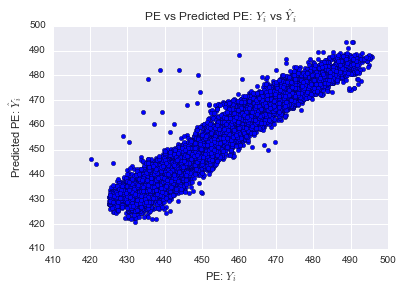

In [15]:
plt.scatter(Y, lreg.predict(X))
plt.xlabel("PE: $Y_i$")
plt.ylabel("Predicted PE: $\hat{Y}_i$")
plt.title("PE vs Predicted PE: $Y_i$ vs $\hat{Y}_i$")

As noticed the plot indicates a strong positive correlation between observed electric output vs predicted output. 

# Splitting data for Training and Validation

Let's now try the linear regression by splitting the datasets into training and validation sets so that we can train the model on the training set and see how well it performs on the validation set.<br>

There is a function in Scikit learn that can do this for us called train_test_split(). This will divide the data sets randomly.

In [16]:
# Define the training and test sets
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,df.PE)

# Print shapes of the training and testing data sets
print X_train.shape 
print X_test.shape 
print Y_train.shape
print Y_test.shape

(7176, 4)
(2392, 4)
(7176,)
(2392,)


By default the data was splitted into proportions of 75% training and 25% test set. We can adjust this proportion if we want to by inserting a parameter 'test_size=' in the above function. 

In [17]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [18]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Let's calculate the mean squared error (MSE)

In [19]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)
    
print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 20.81
Fit a model X_train, and calculate MSE with X_test and Y_test: 20.65


The MSE between the training and testing sets were very close. We can also visualize this by plotting a residual plot.

# Residual Plot
In short the Residual is the difference between the observed value and the predicted value of the dependent variable. If the data points are randomly dispersed around line zero, we know the linear regression is appropraite for the data. 

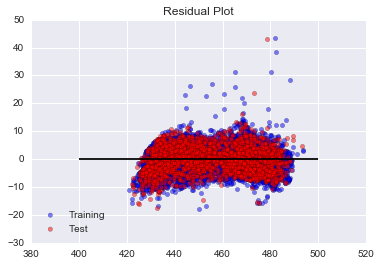

In [20]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=400,xmax=500)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plot')

Looks like the residuals are indeed scattered evenly above and below horizontal line zero. This means there were no discernable patterns that might be of concern with regards to applying a linear regression model to our dataset.

# Conclusion

In conclusion, let's recap on our analysis.

1) We first load and explored the dataset by looking at what type of data they were. This gives us a clue as to what kind of model we can use for the prediction. The goal was to predict the electrical output PE using the other 4 variables.

2) We look for missing values within the dataset, summarized the data and see if there were any outliers.

3) We then visually inspect bivariates using a pairplot with seaborn. 

4) We found that AT and V had a negative linear relationship with the target PE, while AP and RH had a weak positive relationship with PE.

5) SciKit Learn was used to fit the linear regression and the model's equation was formulated. We also calculated the R^2 to be around 0.93.

6) We then split the dataset into training and test sets and calculated the mean squared error.

7) Finally we plotted the residuals for the training and test sets. The random pattern indicates to us a good fit for a linear model, otherwise we should be using a non-linear model.